In [ ]:
# QUESTION NO 1

In [1]:
!pip install ipywidgets pandas

In [2]:
# Cell #1: Import libraries
import csv
from collections import deque, defaultdict

In [3]:
# Cell 2: Data loading function
def load_data(people_file, movies_file, stars_file):
    people = {}
    names = {}
    movies = {}
    movie_stars = defaultdict(set)

    # Load people
    with open(people_file, encoding="utf-8") as f:
        reader = csv.DictReader(f)
        for row in reader:
            people[row["id"]] = {
                "name": row["name"],
                "birth": row["birth"]
            }
            lower_name = row["name"].lower()
            if lower_name not in names:
                names[lower_name] = {row["id"]}
            else:
                names[lower_name].add(row["id"])

    # Load movies
    with open(movies_file, encoding="utf-8") as f:
        reader = csv.DictReader(f)
        for row in reader:
            movies[row["id"]] = {
                "title": row["title"],
                "year": row["year"]
            }

    # Load stars
    with open(stars_file, encoding="utf-8") as f:
        reader = csv.DictReader(f)
        for row in reader:
            movie_stars[row["movie_id"]].add(row["person_id"])

    return people, names, movies, movie_stars

In [4]:
# Cell 3: Shortest path search using BFS
def shortest_path(source_id, target_id, movie_stars):
    graph = defaultdict(list)
    for movie, stars in movie_stars.items():
        stars = list(stars)
        for i in range(len(stars)):
            for j in range(i + 1, len(stars)):
                graph[stars[i]].append((stars[j], movie))
                graph[stars[j]].append((stars[i], movie))

    visited = set()
    queue = deque()
    queue.append((source_id, []))

    while queue:
        current_actor, path = queue.popleft()

        if current_actor == target_id:
            return path

        visited.add(current_actor)

        for neighbor, movie in graph[current_actor]:
            if neighbor not in visited:
                queue.append((neighbor, path + [(movie, neighbor)]))

    return None

In [5]:
# Cell 4: Helper function to get person id by name
def get_person_id(name, names_dict, people_dict):
    name = name.lower()
    if name not in names_dict:
        return None
    ids = list(names_dict[name])
    if len(ids) > 1:
        # If multiple people with the same name, pick the first (or you can customize)
        return ids[0]
    return ids[0]

In [6]:
people, names, movies, movie_stars = load_data(
    "../Q1_dataset/small/people.csv",
    "../Q1_dataset/small/movies.csv",
    "../Q1_dataset/small/stars.csv"
)

In [7]:
# Cell 6: Interactive widget interface for actor selection and result table

import ipywidgets as widgets
from IPython.display import display, clear_output
import pandas as pd

# Prepare a sorted list of unique actor names
actor_names = sorted({info['name'] for info in people.values()})

# Dropdown widgets for actor selection
actor1_dropdown = widgets.Dropdown(
    options=actor_names,
    description='Actor 1:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)
actor2_dropdown = widgets.Dropdown(
    options=actor_names,
    description='Actor 2:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

output_box = widgets.Output()

def on_search_clicked(b):
    with output_box:
        clear_output()
        actor1 = actor1_dropdown.value
        actor2 = actor2_dropdown.value
        if actor1 == actor2:
            print("Please select two different actors.")
            return
        source_id = get_person_id(actor1, names, people)
        target_id = get_person_id(actor2, names, people)
        if not source_id or not target_id:
            print("One or both actors not found.")
            return
        path = shortest_path(source_id, target_id, movie_stars)
        if path:
            print(f"🔗 Shortest path between {actor1} and {actor2}:\n")
            rows = []
            current = source_id
            for movie_id, person_id in path:
                rows.append({
                    "From": people[current]['name'],
                    "To": people[person_id]['name'],
                    "Movie": movies[movie_id]['title'],
                    "Year": movies[movie_id]['year']
                })
                current = person_id
            df = pd.DataFrame(rows)
            display(df)
        else:
            print("No connection found.")

search_button = widgets.Button(description="Find Shortest Connection", button_style='success')
search_button.on_click(on_search_clicked)

# Display the widgets
display(widgets.HBox([actor1_dropdown, actor2_dropdown]), search_button, output_box)

Button(button_style='success', description='Find Shortest Connection', style=ButtonStyle())

Output()

In [ ]:
#QUESTION NO: 2

In [18]:
pip install matplotlib

     ---------------------------------------- 8.1/8.1 MB 5.7 MB/s eta 0:00:00
     ---------------------------------------- 2.7/2.7 MB 6.8 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 47.3 MB/s eta 0:00:00
     ---------------------------------------- 71.9/71.9 kB 4.1 MB/s eta 0:00:00
     -------------------------------------- 111.1/111.1 kB 6.3 MB/s eta 0:00:00
     ------------------------------------- 221.2/221.2 kB 13.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install scikit-learn


[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 11.1/11.1 MB 8.1 MB/s eta 0:00:00
     ------------------------------------- 307.7/307.7 kB 18.6 MB/s eta 0:00:00
     --------------------------------------- 41.3/41.3 MB 24.2 MB/s eta 0:00:00


In [2]:
pip install opencv-python

     -------------------------------------- 39.5/39.5 MB 395.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
pip install tensorflow

^C
Note: you may need to restart the kernel to use updated packages.


In [9]:
# Cell 1: Import libraries
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [10]:
# Cell 2: Define constants
IMG_WIDTH = 30
IMG_HEIGHT = 30
NUM_CATEGORIES = 43  # Change this if your dataset has a different number of categories
TEST_SIZE = 0.4

In [11]:
# Cell 3: Load and preprocess data
def load_data(data_dir):
    images = []
    labels = []
    count = 0
    for category in range(NUM_CATEGORIES):
        category_dir = os.path.join(data_dir, str(category))
        if not os.path.isdir(category_dir):
            continue
        for filename in os.listdir(category_dir):
            file_path = os.path.join(category_dir, filename)
            img = cv2.imread(file_path)
            if img is None:
                continue
            img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))
            images.append(img)
            labels.append(category)
            if count < 10:
                print(f"Loaded: {file_path} as label {category}")
                count += 1
    return images, labels

In [12]:
# Cell 4: Load dataset
data_dir = "."  # Use current directory since notebook is in Q2_dataset
images, labels = load_data(data_dir)
print("Loaded images:", len(images))
print("Loaded labels:", len(labels))
images = np.array(images)
labels = np.array(labels)



Loaded: .\0\00000_00000.ppm as label 0
Loaded: .\0\00000_00001.ppm as label 0
Loaded: .\0\00000_00002.ppm as label 0
Loaded: .\0\00000_00003.ppm as label 0
Loaded: .\0\00000_00004.ppm as label 0
Loaded: .\0\00000_00005.ppm as label 0
Loaded: .\0\00000_00006.ppm as label 0
Loaded: .\0\00000_00007.ppm as label 0
Loaded: .\0\00000_00008.ppm as label 0
Loaded: .\0\00000_00009.ppm as label 0
Loaded images: 26640
Loaded labels: 26640


In [13]:
# Cell 5: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=TEST_SIZE, random_state=42, stratify=labels
)
y_train = to_categorical(y_train, NUM_CATEGORIES)
y_test = to_categorical(y_test, NUM_CATEGORIES)

In [14]:
# Cell 6: Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(NUM_CATEGORIES, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

c:\Users\Muhammad Azan Afzal\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,979 (1.22 MB)

 Trainable params: 319,979 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Cell 7: Train the model
EPOCHS = 10
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=EPOCHS,
    batch_size=64
)

Epoch 1/10
  1/250 ━━━━━━━━━━━━━━━━━━━━ 55s 221ms/step - accuracy: 0.0781 - loss: 3.5366

250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.0564 - loss: 3.5016 - val_accuracy: 0.0563 - val_loss: 3.4990
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 45ms/step - accuracy: 0.0524 - loss: 3.4955 - val_accuracy: 0.0566 - val_loss: 3.4980
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.0541 - loss: 3.5068 - val_accuracy: 0.0563 - val_loss: 3.4980
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 34s 103ms/step - accuracy: 0.0591 - loss: 3.4995 - val_accuracy: 0.0563 - val_loss: 3.4977
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 28s 50ms/step - accuracy: 0.0529 - loss: 3.4991 - val_accuracy: 0.0563 - val_loss: 3.4975
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 19s 44ms/step - accuracy: 0.0567 - loss: 3.4954 - val_accuracy: 0.0563 - val_loss: 3.4974
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 13s 51ms/step - accuracy: 0.0558 - loss: 3.4973 - val_accuracy: 0.0563 - val_loss: 3.4973
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.0553 - loss: 3.5022 - val_accura

In [23]:
# Cell 8: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {accuracy:.4f}")

# Cell 9: Save the model (optional)
model.save("road_sign_model.h5")
print("Model saved as road_sign_model.h5")

333/333 - 2s - 7ms/step - accuracy: 0.0563 - loss: 3.4972


Test accuracy: 0.0563
Model saved as road_sign_model.h5


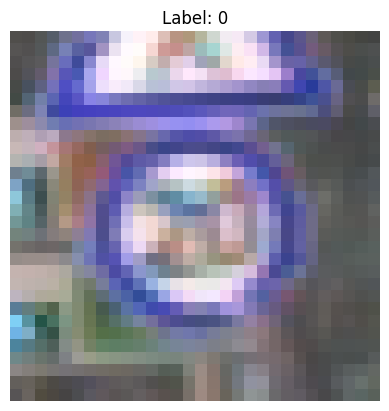

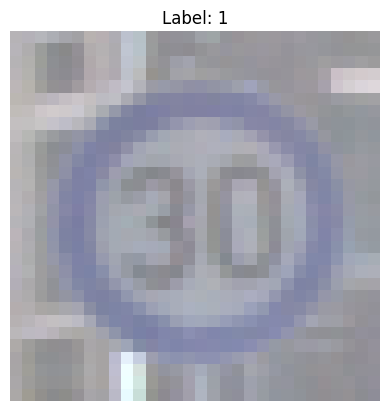

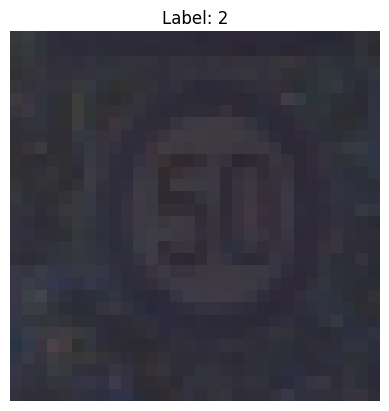

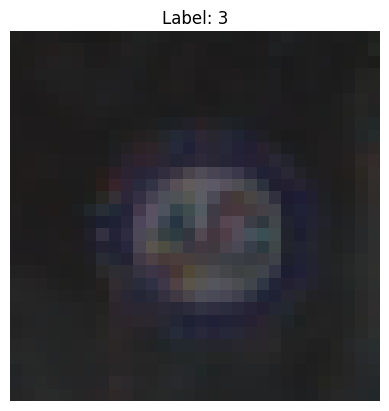

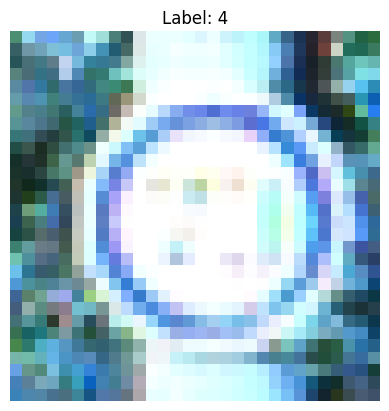

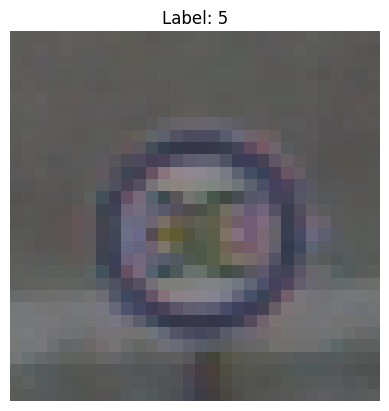

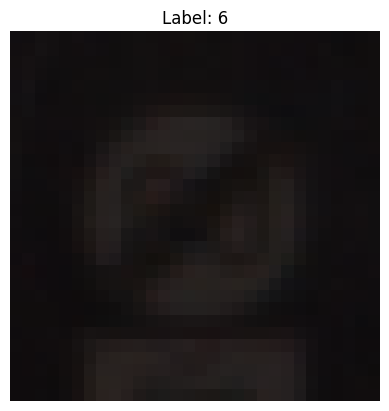

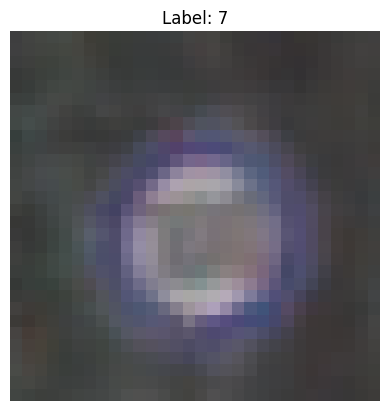

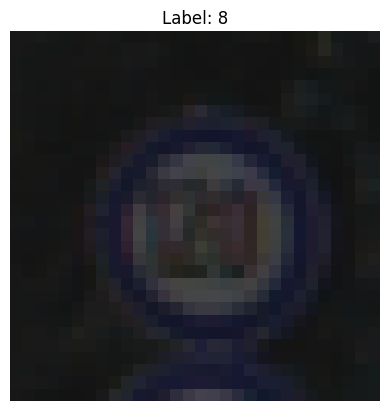

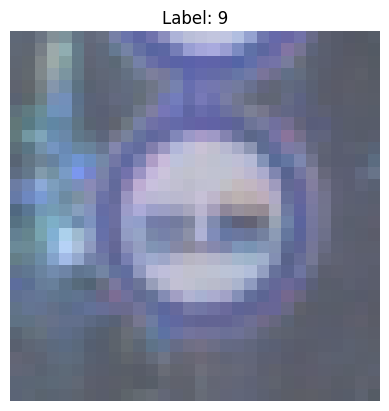

In [24]:
# Cell 10: Visualize some images with their labels
import numpy as np
unique_labels = np.unique(labels)
for label in unique_labels[:10]:  # Show one image for the first 10 unique labels
    idx = np.where(labels == label)[0][0]
    plt.imshow(images[idx])
    plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


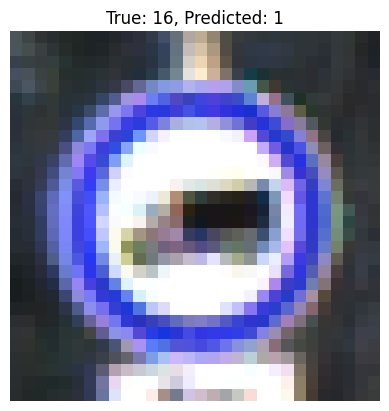

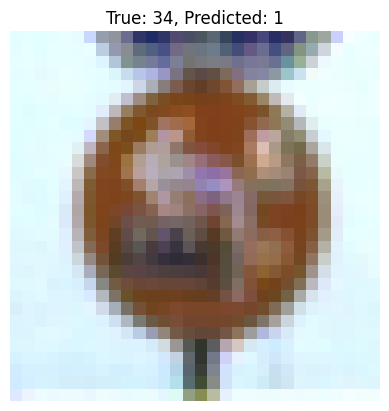

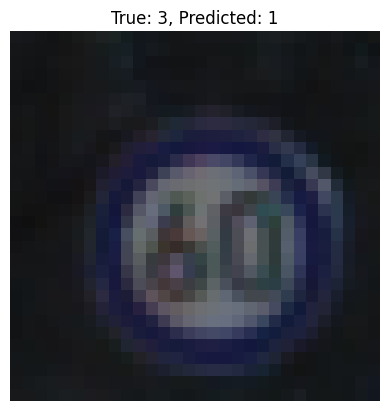

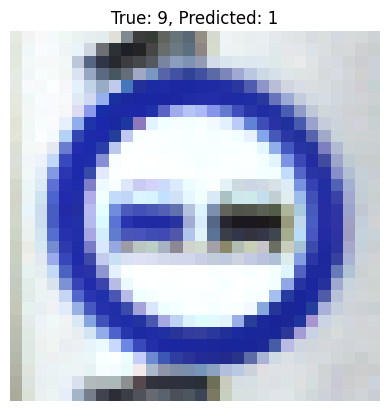

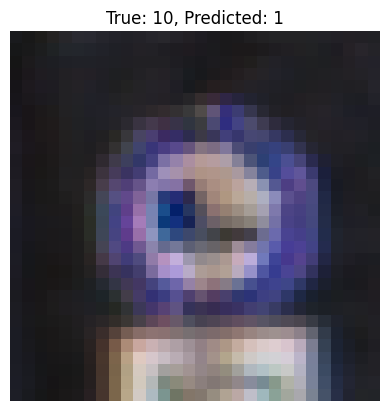

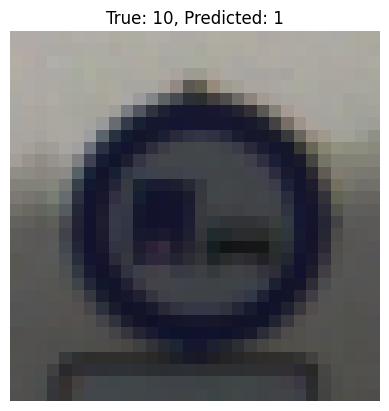

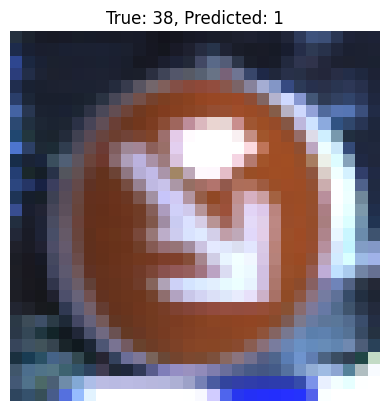

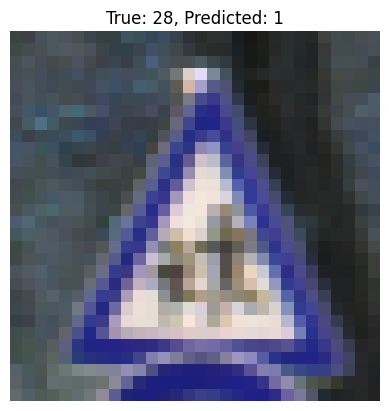

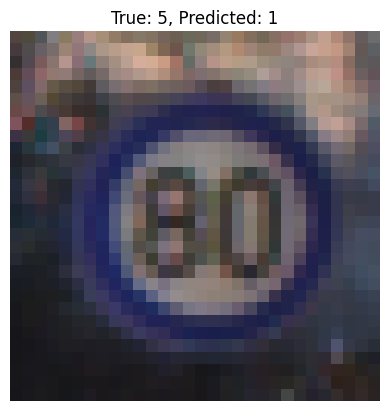

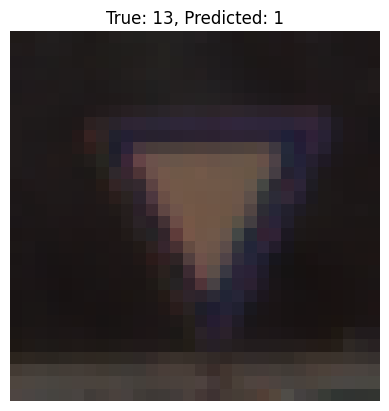

In [25]:
# Cell 11: Predict and visualize model predictions

import random

# Select random indices from the test set
num_samples = 10
indices = random.sample(range(len(X_test)), num_samples)

# Get predictions
predictions = model.predict(X_test[indices])
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test[indices], axis=1)

# Visualize predictions
for i, idx in enumerate(indices):
    plt.imshow(cv2.resize(X_test[idx], (120, 120), interpolation=cv2.INTER_NEAREST))
    plt.title(f"True: {true_labels[i]}, Predicted: {predicted_labels[i]}")
    plt.axis('off')
    plt.show()

333/333 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


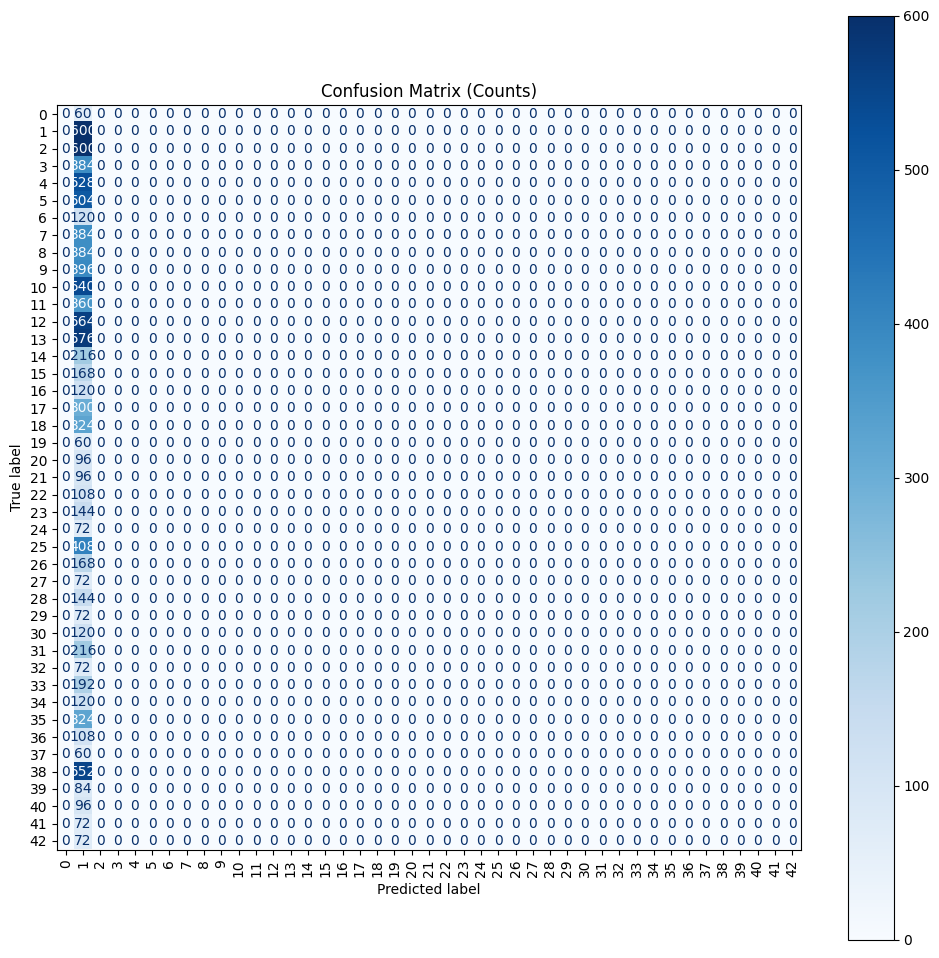

Some correct predictions:


C:\Users\Muhammad Azan Afzal\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


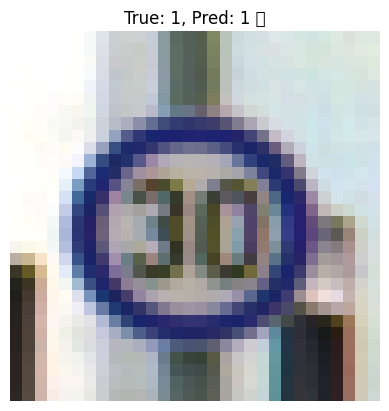

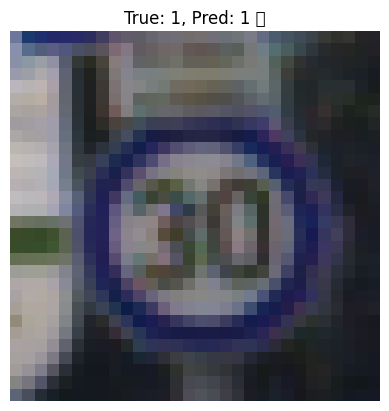

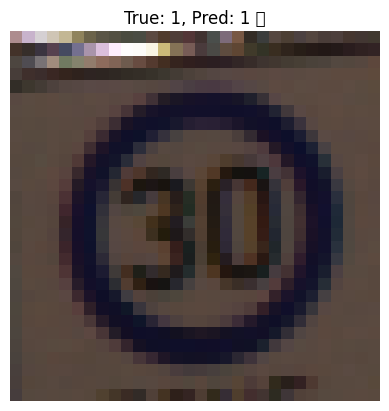

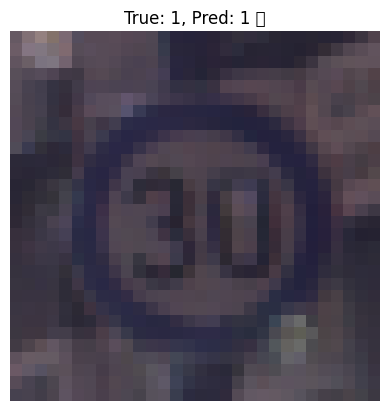

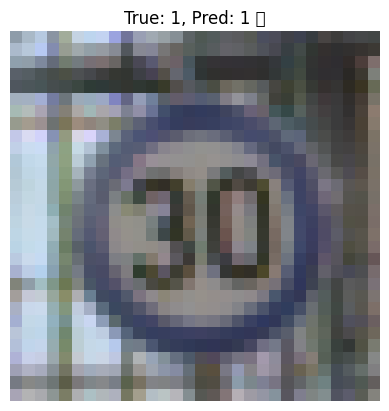

Some incorrect predictions:


C:\Users\Muhammad Azan Afzal\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


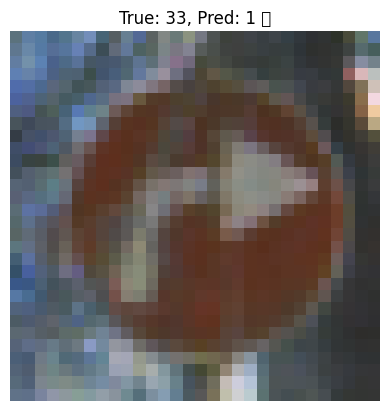

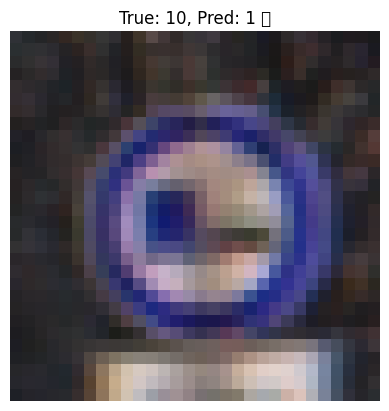

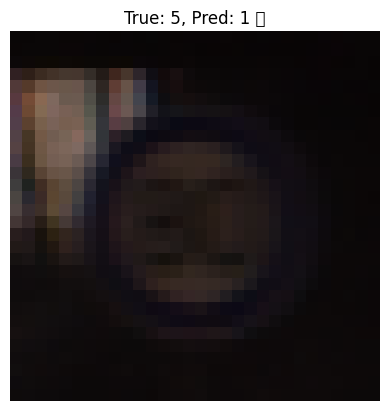

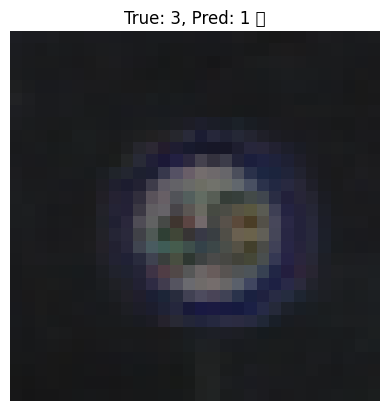

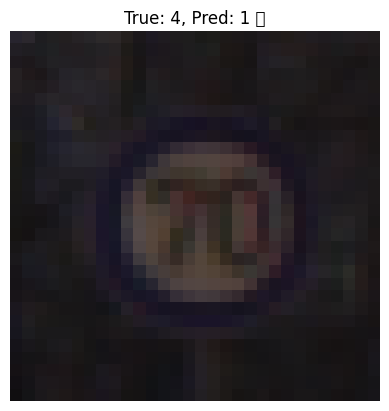

In [26]:
# Cell 12: Enhanced visualization and confusion matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# (Optional) Define class names if you have them, otherwise use numbers
class_names = [str(i) for i in range(NUM_CATEGORIES)]

# Predict on the whole test set
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Show confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(12, 12))
disp.plot(ax=ax, cmap='Blues', xticks_rotation='vertical', values_format='d')
plt.title("Confusion Matrix (Counts)")
plt.show()

# Visualize some correct and incorrect predictions
correct = np.where(y_pred_labels == y_true_labels)[0]
incorrect = np.where(y_pred_labels != y_true_labels)[0]

print("Some correct predictions:")
for idx in correct[:5]:
    plt.imshow(cv2.resize(X_test[idx], (120, 120), interpolation=cv2.INTER_NEAREST))
    plt.title(f"True: {class_names[y_true_labels[idx]]}, Pred: {class_names[y_pred_labels[idx]]} ✅")
    plt.axis('off')
    plt.show()

print("Some incorrect predictions:")
for idx in incorrect[:5]:
    plt.imshow(cv2.resize(X_test[idx], (120, 120), interpolation=cv2.INTER_NEAREST))
    plt.title(f"True: {class_names[y_true_labels[idx]]}, Pred: {class_names[y_pred_labels[idx]]} ❌")
    plt.axis('off')
    plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.06      1.00      0.11       600
           2       0.00      0.00      0.00       600
           3       0.00      0.00      0.00       384
           4       0.00      0.00      0.00       528
           5       0.00      0.00      0.00       504
           6       0.00      0.00      0.00       120
           7       0.00      0.00      0.00       384
           8       0.00      0.00      0.00       384
           9       0.00      0.00      0.00       396
          10       0.00      0.00      0.00       540
          11       0.00      0.00      0.00       360
          12       0.00      0.00      0.00       564
          13       0.00      0.00      0.00       576
          14       0.00      0.00      0.00       216
          15       0.00      0.00      0.00       168
          16       0.00      0.00      0.00       120
    

c:\Users\Muhammad Azan Afzal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Muhammad Azan Afzal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Muhammad Azan Afzal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to cont

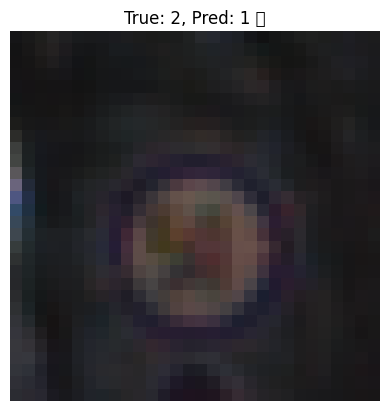

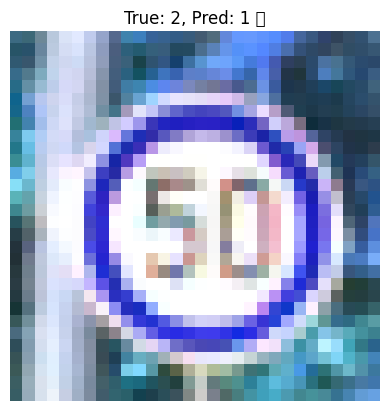

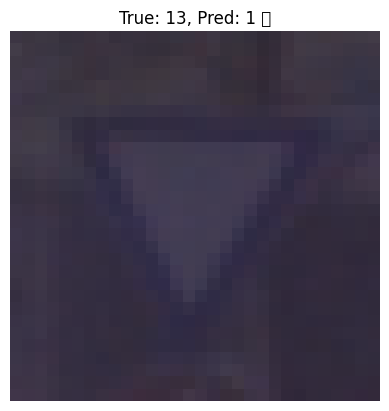

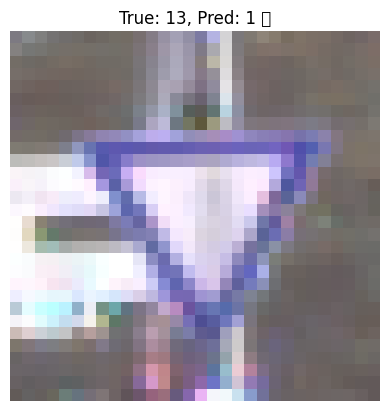

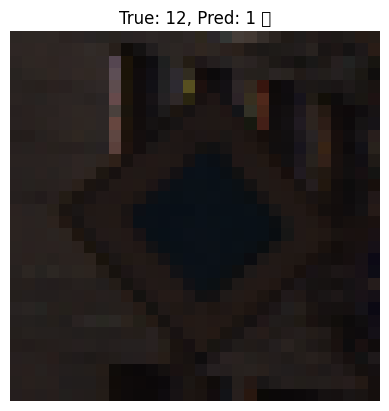

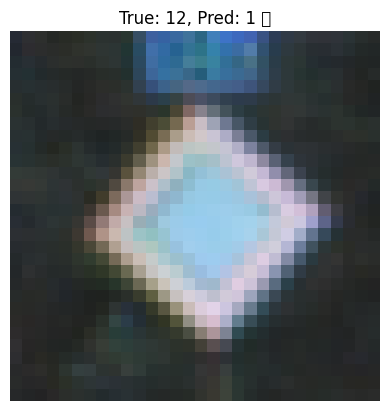

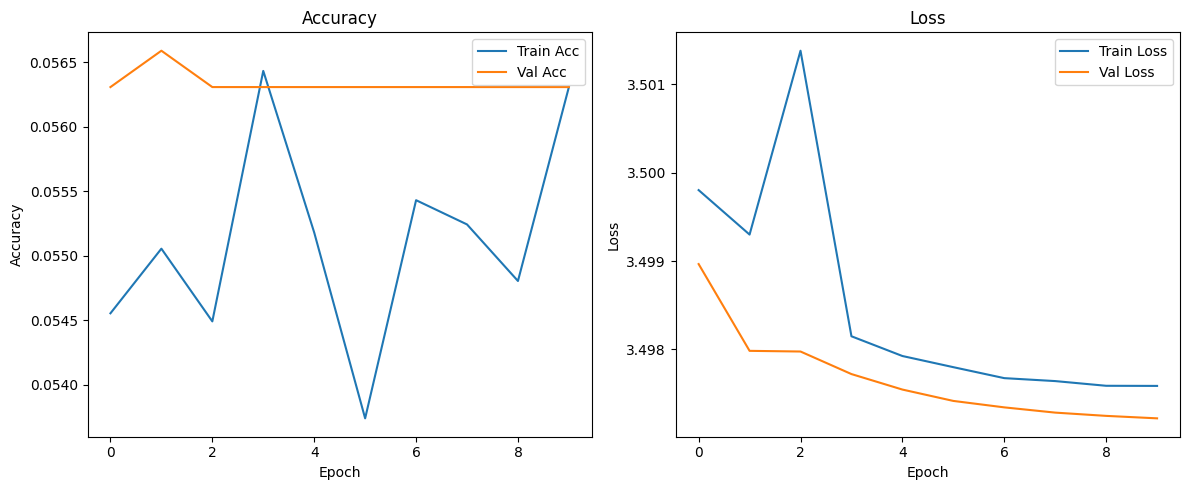

In [27]:
# Cell 13: More analysis and visualization

# 1. Print classification report for precision, recall, f1-score
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_true_labels, y_pred_labels, target_names=class_names))

# 2. Show the most confused classes (top 5)
import numpy as np

cm = confusion_matrix(y_true_labels, y_pred_labels)
np.fill_diagonal(cm, 0)  # Ignore correct predictions
confused_pairs = np.dstack(np.unravel_index(np.argsort(cm.ravel())[::-1], cm.shape))[0]
print("\nMost confused class pairs (True, Predicted, Count):")
for i in range(5):
    true_idx, pred_idx = confused_pairs[i]
    if cm[true_idx, pred_idx] == 0:
        break
    print(f"{class_names[true_idx]} → {class_names[pred_idx]}: {cm[true_idx, pred_idx]}")

# 3. Visualize some of the most confused examples
print("\nExamples of most confused classes:")
for i in range(3):
    true_idx, pred_idx = confused_pairs[i]
    mask = (y_true_labels == true_idx) & (y_pred_labels == pred_idx)
    idxs = np.where(mask)[0]
    for idx in idxs[:2]:  # Show up to 2 examples per confused pair
        plt.imshow(cv2.resize(X_test[idx], (120, 120), interpolation=cv2.INTER_NEAREST))
        plt.title(f"True: {class_names[true_idx]}, Pred: {class_names[pred_idx]} ❌")
        plt.axis('off')
        plt.show()

# 4. Plot training and validation accuracy/loss curves
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

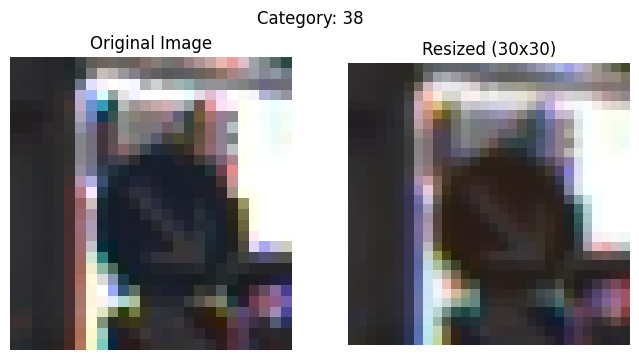

In [28]:
# Cell: Compare original and resized image for a random test sample

import matplotlib.pyplot as plt
import random
import cv2
import os

# Pick a random category and a random image from that category
random_category = random.choice(os.listdir(data_dir))
category_dir = os.path.join(data_dir, random_category)
random_image_file = random.choice(os.listdir(category_dir))
original_path = os.path.join(category_dir, random_image_file)

# Load the original image
original_img = cv2.imread(original_path)
original_img_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)

# Resize the image as done in preprocessing
resized_img = cv2.resize(original_img, (IMG_WIDTH, IMG_HEIGHT))

# Show both images side by side
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(original_img_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(resized_img)
plt.title(f"Resized ({IMG_WIDTH}x{IMG_HEIGHT})")
plt.axis('off')

plt.suptitle(f"Category: {random_category}")
plt.show()

In [7]:
# QUOTE 

print("“The beautiful thing about learning is that nobody can take it away from you.”")

“The beautiful thing about learning is that nobody can take it away from you.”
